In [63]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [64]:
import pandas as pd


In [65]:
from sklearn.model_selection import train_test_split


In [66]:

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [67]:
d = pd.read_csv('D:/Jupyter-Notebook-Crash-Course/Datasets/HDS_pp_v2.csv')



In [68]:
predictors = d.drop(['HeartDisease'], axis=1)
target = d["HeartDisease"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print(X_train.shape)
X_test.shape
Y_test.shape


(734, 15)


(184,)

In [69]:
# Create logistic regression object
logistic_regression = LogisticRegression(solver="liblinear",
random_state=0)
# Train model
model = logistic_regression.fit(X_train, Y_train)
#Predictions
Y_pred = model.predict(X_test)

Exercise 2: Analyze the performance of logistic regression with respect to accuracy, recall, precision, FPR, and
ROC metrics obtained for heart dataset.

In [70]:
print("The accuracy is"+str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%")
print(confusion_matrix(Y_test, Y_pred))
target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred,
target_names=target_names))


The accuracy is83.69565217391305%
[[57 20]
 [10 97]]
              precision    recall  f1-score   support

     class 0       0.85      0.74      0.79        77
     class 1       0.83      0.91      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.84      0.83       184



In [71]:
# checking predcition prob of trained model
y_proba = model.predict_proba(X_test)
y_proba

array([[0.03202427, 0.96797573],
       [0.17351608, 0.82648392],
       [0.02483543, 0.97516457],
       [0.0968311 , 0.9031689 ],
       [0.94726874, 0.05273126],
       [0.82760767, 0.17239233],
       [0.9896679 , 0.0103321 ],
       [0.98111773, 0.01888227],
       [0.88859193, 0.11140807],
       [0.88803041, 0.11196959],
       [0.05833444, 0.94166556],
       [0.05104708, 0.94895292],
       [0.02413281, 0.97586719],
       [0.07264368, 0.92735632],
       [0.79604   , 0.20396   ],
       [0.02477447, 0.97522553],
       [0.1585669 , 0.8414331 ],
       [0.05390904, 0.94609096],
       [0.08680272, 0.91319728],
       [0.73581824, 0.26418176],
       [0.09428   , 0.90572   ],
       [0.07355625, 0.92644375],
       [0.16339107, 0.83660893],
       [0.04728745, 0.95271255],
       [0.97338946, 0.02661054],
       [0.9879376 , 0.0120624 ],
       [0.07103483, 0.92896517],
       [0.02303346, 0.97696654],
       [0.04621743, 0.95378257],
       [0.5982256 , 0.4017744 ],
       [0.

c:\Users\CloudJunction\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


IndexError: index 0 is out of bounds for axis 0 with size 0

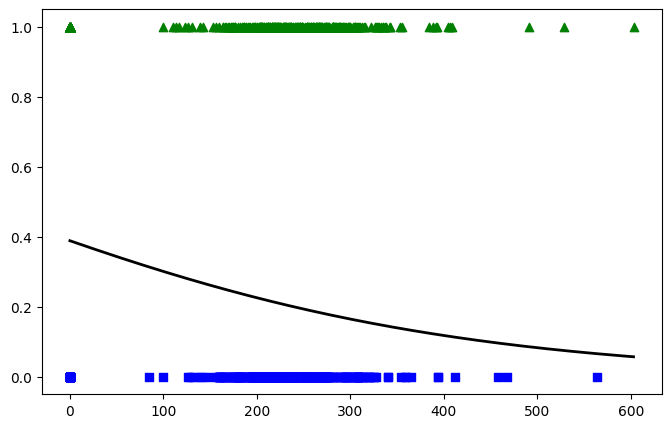

In [72]:
# Ensure Cholesterol exists
assert "Cholesterol" in d.columns, "Cholesterol column not found!"

# Get index safely
feature_index = d.columns.get_loc("Cholesterol")  # Get column index safely

# Ensure X_train is a NumPy array
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()

# Extract feature
X_feature = X_train[:, feature_index].reshape(-1, 1)

# Generate new feature values for smooth probability curve
X_new = np.linspace(X_feature.min(), X_feature.max(), 300).reshape(-1, 1)

# Predict probability using only "Cholesterol"
X_dummy = np.zeros((300, X_train.shape[1]))
X_dummy[:, feature_index] = X_new.flatten()

y_proba = model.predict_proba(X_dummy)[:, 1]  # Probability of class 1

# ---- Plot Decision Boundary ----
plt.figure(figsize=(8, 5))
plt.scatter(X_feature[Y_train == 0], Y_train[Y_train == 0], color='blue', marker='s', label="No Heart Disease")
plt.scatter(X_feature[Y_train == 1], Y_train[Y_train == 1], color='green', marker='^', label="Heart Disease")
plt.plot(X_new, y_proba, "k-", linewidth=2, label="Sigmoid Curve")  # Sigmoid curve

# Decision boundary (probability = 0.5)
decision_boundary = X_new[y_proba >= 0.5][0]
plt.axvline(decision_boundary, color='r', linestyle="--", linewidth=2, label="Decision Boundary")

plt.xlabel("Standardized Cholesterol (chol)", fontsize=14)
plt.ylabel("Probability of Heart Disease", fontsize=14)
plt.legend()
plt.title("Logistic Regression Decision Boundary (Only chol)")
plt.show()
